In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = \
[[['Дмитрий', 'Пестров'],
  ['Дмитрий', 'Пестров', 'Пестрова'],
  ['Дмитрий', 'Пестров', 'Пестрова', 'Кренделькова'],
  ['Дмитрий', 'Пестров', 'Пестрова', 'Кренделькова', 'Дворецкий'],
  ['Пестрова', 'Кренделькова'],
  ['Пестрова', 'Надя'],
  ['Пестрова', 'Надя', 'Николай', 'Пестров', 'Дмитрий']],
 [['Князь', 'Катышев', 'Камердинер'],
  ['Князь', 'Катышев', 'Княжна'],
  ['Князь', 'Катышев', 'Княжна', 'Камердинер'],
  ['Благодатский', 'Князь'],
  ['Благодатский', 'Князь', 'Катышев'],
  ['Благодатский', 'Князь', 'Катышев', 'Камердинер', 'Николай']],
 [['Лавронский', 'Лили'],
  ['Лили', 'Благодатский', 'Иванцов'],
  ['Лавронский', 'Лили', 'Благодатский', 'Иванцов'],
  ['Чубин', 'Горохов', 'Благодатский', 'Иванцов'],
  ['Князь', 'Надя', 'Благодатский'],
  ['Благодатский', 'Иванцов', 'Чубин', 'Горохов', 'Князь'],
  ['Благодатский', 'Князь', 'Пестрова', 'Медузов'],
  ['Благодатский', 'Князь', 'Пестрова', 'Николай'],
  ['Благодатский', 'Князь', 'Пестрова', 'Надя'],
  ['Благодатский', 'Князь', 'Пестрова', 'Надя', 'Медузов'],
  ['Надя', 'Князь'],
  ['Медузов', 'Пестрова', 'Лавронский', 'Лили', 'Благодатский', 'Толстая дама', 'Надя'],
  ['Николай', 'Медузов', 'Пестрова', 'Лавронский', 'Иванцова', 'Благодатский', 'Толстая дама', 'Надя']],
 [['Катышев', 'Камердинер', 'Номерной'],
  ['Катышев', 'Камердинер', 'Номерной', 'Князь'],
  ['Катышев', 'Дмитрий'],
  ['Катышев', 'Дмитрий', 'Махалов', 'Рабуковский'],
  ['Номерной', 'Благодатский', 'Надя'],
  ['Благодатский', 'Надя', 'Дмитрий', 'Махалов', 'Рабуковский', 'Катышев']]]


## Матрица

In [3]:
drama_heroes = [hero for act in data for scene in act for hero in scene]
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [4]:
def rome(dec):
    return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[dec]

def col(act, scene):
    return rome(act) + '.' + str(scene)

def cols():
    return [col(n_act+1, n_scene+1) for n_act, act in enumerate(matrices) for n_scene in range(len(act[0]))]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=cols())

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,II.1,II.2,II.3,II.4,II.5,II.6,III.1,III.2,III.3,III.4,III.5,III.6,III.7,III.8,III.9,III.10,III.11,III.12,III.13,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6
Благодатский,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,1
Горохов,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Дворецкий,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Дмитрий,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
Иванцов,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Иванцова,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Камердинер,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
Катышев,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1
Княжна,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Князь,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0


## Мобильность

In [5]:
def mob(mat):
    return (np.sum(np.abs(mat[:, 1:] - mat[:, :-1]), axis=1) - 1) / (len(mat[0])-1)

index = list(range(1, len(matrices) + 1)) + ['пьеса']
mobility = list(map(mob, matrices + [matrix]))
mobility = pd.DataFrame(mobility, index=index, columns=drama_heroes).round(2).transpose()
mobility[mobility < 0] = ''
mobility

,1,2,3,4,пьеса
Благодатский,,0,0.17,0,0.19
Горохов,,,0.25,,0.10
Дворецкий,0.17,,,,0.03
Дмитрий,0.17,,,0.4,0.16
Иванцов,,,0.25,,0.10
Иванцова,,,0,,0.03
Камердинер,,0.6,,0,0.23
Катышев,,0.2,,0.2,0.19
Княжна,,0.2,,,0.03
Князь,,,0.08,0.2,0.16


## Плотность

In [6]:
def dens(matrix):
#     print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

In [7]:
print('Плотность всей пьесы:', round(dens(matrix), 2))

act_d = list(map(dens, matrices))
act_d_ = np.array(act_d).reshape(-1, 1)
scene_d = [[dens(c) for c in m.T] for m in matrices]
scene_d_ = pd.DataFrame(scene_d).values # to fill with nans
columns = list(range(1, len(scene_d_[0]) + 1)) + ['действия']
index = list(range(1, len(data)+1))
density = pd.DataFrame(np.hstack((scene_d_, act_d_)), columns=columns, index=index)
density.round(2).fillna('')

Плотность всей пьесы: 0.16


,1,2,3,4,5,6,7,8,9,10,11,12,13,действия
1,0.09,0.13,0.17,0.22,0.09,0.09,0.22,,,,,,,0.14
2,0.13,0.13,0.17,0.09,0.13,0.22,,,,,,,,0.14
3,0.09,0.13,0.17,0.17,0.13,0.22,0.17,0.17,0.17,0.22,0.09,0.3,0.35,0.18
4,0.13,0.17,0.09,0.17,0.13,0.26,,,,,,,,0.16


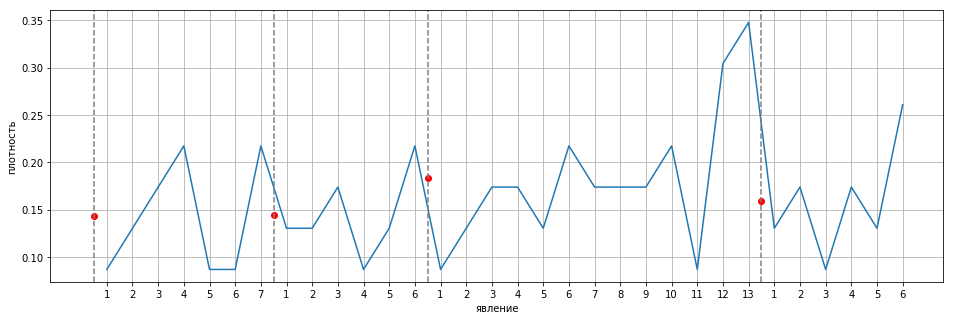

In [8]:
from itertools import accumulate

plt.subplots(figsize=(16, 5));

flat = [tup for act in scene_d for tup in enumerate(act, start=1)]
ticks, values = zip(*flat)
plt.plot(values);
plt.xticks(range(len(ticks)), ticks);

borders = np.array(list(accumulate(map(len, [[]] + scene_d))))
plt.scatter(borders[:-1]-0.5, act_d, c='red');
for x in borders[:-1]:
    plt.axvline(x-0.5, c='gray', ls='--');
    
plt.xlabel('явление');
plt.ylabel('плотность');
plt.grid();

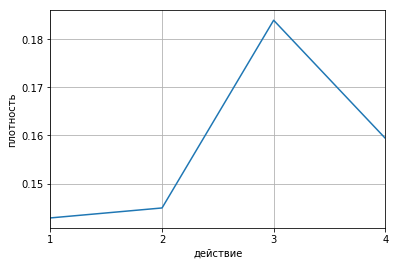

In [9]:
plt.plot(act_d)
plt.grid();
plt.xlabel('действие');
plt.ylabel('плотность');
plt.xticks(range(len(act_d)+1), range(1, len(act_d)+1));
plt.xlim([0, len(act_d)-1]);

## Расстояние

In [10]:
def dist(mat):
    n = len(drama_heroes)
    dist = np.zeros((n, n))*np.nan
    for i in range(n-1):
        for j in range(i+1, n):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = dist[j][i] = np.sum(np.abs(mat[i] - mat[j]))
    return dist/len(mat[0])

In [11]:
act_d = [dist(m) for m in matrices]
drama_d = dist(matrix)

In [12]:
distances = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in act_d + [drama_d]]
distances = pd.concat(distances, axis=1)
distances.columns = list(range(1, len(act_d) + 1)) + ['пьеса']
distances.round(2).fillna('')

1     2     3     4  пьеса
Благодатский Горохов                   0.69         0.44
             Дворецкий                              0.53
             Дмитрий                          0.5   0.69
             Иванцов                   0.54         0.38
             Иванцова                  0.77         0.47
             Камердинер          0.67        0.67   0.59
             Катышев             0.67        0.83   0.62
             Княжна              0.83               0.56
             Князь                0.5  0.46   0.5   0.38
             Кренделькова                           0.59
             Лавронский                0.69         0.44
             Лили                      0.69         0.44
             Махалов                         0.33   0.50
             Медузов                   0.54         0.38
             Надя                      0.54     0   0.38
             Николай             0.33  0.69         0.44
             Номерной                         0.5   0.53
             Пестров                                0.66
             Пестрова                  0.38         0.50
             Рабуковский                     0.33   0.50
             Толстая дама              0.69         0.44
             Чубин                     0.69         0.44
Горохов      Благодатский              0.69         0.44
             Дворецкий                              0.09
             Дмитрий                                0.31
             Иванцов                   0.15         0.06
             Иванцова                  0.23         0.09
             Камердинер                             0.22
             Катышев                                0.38
             Княжна                                 0.12
             Князь                     0.54         0.44
             Кренделькова                           0.16
             Лавронский                0.46         0.19
             Лили                      0.46         0.19
             Махалов                                0.12
             Медузов                   0.46         0.19
             Надя                      0.62         0.38
             Николай                   0.31         0.19
             Номерной                               0.16
             Пестров                                0.22
             Пестрова                  0.62         0.44
             Рабуковский                            0.12
             Толстая дама              0.31         0.12
             Чубин                        0         0.00
Дворецкий    Благодатский                           0.53
             Горохов                                0.09
             Дмитрий       0.57                     0.22
             Иванцов                                0.16
             Иванцова                               0.06
             Камердинер                             0.19
             Катышев                                0.34
             Княжна                                 0.09
             Князь                                  0.47
             Кренделькова  0.29                     0.06
             Лавронский                             0.16
             Лили                                   0.16
             Махалов                                0.09
             Медузов                                0.16
             Надя          0.43                     0.34
             Николай       0.29                     0.16
             Номерной                               0.12
             Пестров       0.57                     0.12
             Пестрова      0.71                     0.34
             Рабуковский                            0.09
             Толстая дама                           0.09
             Чубин                                  0.09
Дмитрий      Благодатский                     0.5   0.69
             Горохов                                0.31
             Дворецкий     0.57                     0.22
             Иванцов                    

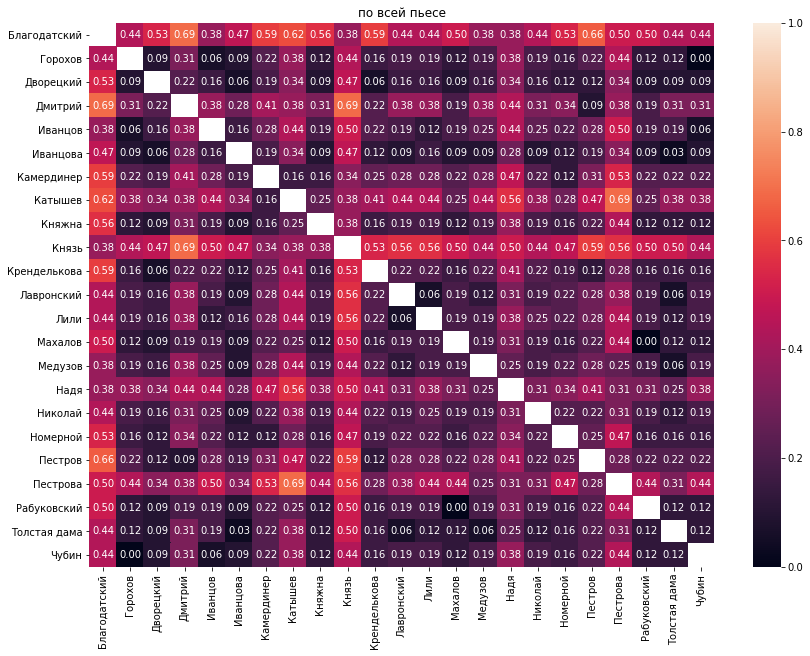

In [13]:
plt.subplots(figsize=(14, 10))
sns.heatmap(drama_d, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [14]:
for i, j in zip(*np.where(drama_d == 0)):
    if i != j and i < j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

Горохов = Чубин
Махалов = Рабуковский


## Ранг

In [15]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]
df = pd.DataFrame(dict(zip(drama_heroes, rank)), index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)

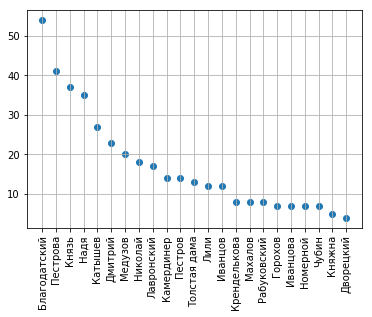

In [16]:
plt.scatter(range(len(drama_heroes)), df.values);
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90);
plt.grid();

In [17]:
df

,Благодатский,Пестрова,Князь,Надя,Катышев,Дмитрий,Медузов,Николай,Лавронский,Камердинер,Пестров,Толстая дама,Лили,Иванцов,Кренделькова,Махалов,Рабуковский,Горохов,Иванцова,Номерной,Чубин,Княжна,Дворецкий
ранг,54,41,37,35,27,23,20,18,17,14,14,13,12,12,8,8,8,7,7,7,7,5,4


## Абсолютные относительные частоты

In [18]:
def freq(mat):
    return np.sum(mat, axis=1)/len(mat[0])

index = list(range(1, len(matrices) + 1)) + ['пьеса']
freq_abs = list(map(freq, matrices + [matrix]))
freq_abs = pd.DataFrame(freq_abs, index=index, columns=drama_heroes).round(2).transpose()
freq_abs[freq_abs == 0] = ''
freq_abs.sort_values(by='пьеса', ascending=False)

,1,2,3,4,пьеса
Благодатский,,0.5,0.85,0.33,0.50
Князь,,1,0.54,0.17,0.44
Пестрова,0.86,,0.46,,0.38
Катышев,,0.83,,0.83,0.31
Надя,0.29,,0.46,0.33,0.31
Дмитрий,0.71,,,0.5,0.25
Пестров,0.71,,,,0.16
Камердинер,,0.5,,0.33,0.16
Лили,,,0.31,,0.12
Николай,0.14,0.17,0.15,,0.12


## Условные относительные частоты

In [19]:
def rel_freq(mat):
    busyness = np.sum(mat, axis=1)
    freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
    for i in range(len(mat)):
        for j in range(len(mat)):
            if busyness[j] == 0 or i == j:
                freq_rel[i, j] = np.nan
            else:
                freq_rel[i, j] = np.count_nonzero(mat[i] + mat[j] - 2 == 0)/busyness[j]
    return freq_rel

for i, m in enumerate(matrices):
    print('Действие', i+1)
    pd.DataFrame(rel_freq(m), index=drama_heroes, columns=drama_heroes).round(2).fillna('')
    
print('По всей пьесе')
pd.DataFrame(rel_freq(matrix), index=drama_heroes, columns=drama_heroes).round(2).fillna('')

Действие 1


,Благодатский,Горохов,Дворецкий,Дмитрий,Иванцов,Иванцова,Камердинер,Катышев,Княжна,Князь,Кренделькова,Лавронский,Лили,Махалов,Медузов,Надя,Николай,Номерной,Пестров,Пестрова,Рабуковский,Толстая дама,Чубин
Благодатский,,,0,0,,,,,,,0,,,,,0,0,,0,0,,,
Горохов,,,0,0,,,,,,,0,,,,,0,0,,0,0,,,
Дворецкий,,,,0.2,,,,,,,0.33,,,,,0,0,,0.2,0.17,,,
Дмитрий,,,1,,,,,,,,0.67,,,,,0.5,1,,1,0.67,,,
Иванцов,,,0,0,,,,,,,0,,,,,0,0,,0,0,,,
Иванцова,,,0,0,,,,,,,0,,,,,0,0,,0,0,,,
Камердинер,,,0,0,,,,,,,0,,,,,0,0,,0,0,,,
Катышев,,,0,0,,,,,,,0,,,,,0,0,,0,0,,,
Княжна,,,0,0,,,,,,,0,,,,,0,0,,0,0,,,
Князь,,,0,0,,,,,,,0,,,,,0,0,,0,0,,,


Действие 2


,Благодатский,Горохов,Дворецкий,Дмитрий,Иванцов,Иванцова,Камердинер,Катышев,Княжна,Князь,Кренделькова,Лавронский,Лили,Махалов,Медузов,Надя,Николай,Номерной,Пестров,Пестрова,Рабуковский,Толстая дама,Чубин
Благодатский,,,,,,,0.33,0.4,0,0.5,,,,,,,1,,,,,,
Горохов,0,,,,,,0,0,0,0,,,,,,,0,,,,,,
Дворецкий,0,,,,,,0,0,0,0,,,,,,,0,,,,,,
Дмитрий,0,,,,,,0,0,0,0,,,,,,,0,,,,,,
Иванцов,0,,,,,,0,0,0,0,,,,,,,0,,,,,,
Иванцова,0,,,,,,0,0,0,0,,,,,,,0,,,,,,
Камердинер,0.33,,,,,,,0.6,0.5,0.5,,,,,,,1,,,,,,
Катышев,0.67,,,,,,1,,1,0.83,,,,,,,1,,,,,,
Княжна,0,,,,,,0.33,0.4,,0.33,,,,,,,0,,,,,,
Князь,1,,,,,,1,1,1,,,,,,,,1,,,,,,


Действие 3


,Благодатский,Горохов,Дворецкий,Дмитрий,Иванцов,Иванцова,Камердинер,Катышев,Княжна,Князь,Кренделькова,Лавронский,Лили,Махалов,Медузов,Надя,Николай,Номерной,Пестров,Пестрова,Рабуковский,Толстая дама,Чубин
Благодатский,,1,,,1,1,,,,0.86,,0.75,0.75,,1,0.83,1,,,1,,1,1
Горохов,0.18,,,,0.5,0,,,,0.14,,0,0,,0,0,0,,,0,,0,1
Дворецкий,0,0,,,0,0,,,,0,,0,0,,0,0,0,,,0,,0,0
Дмитрий,0,0,,,0,0,,,,0,,0,0,,0,0,0,,,0,,0,0
Иванцов,0.36,1,,,,0,,,,0.14,,0.25,0.5,,0,0,0,,,0,,0,1
Иванцова,0.09,0,,,0,,,,,0,,0.25,0,,0.25,0.17,0.5,,,0.17,,0.5,0
Камердинер,0,0,,,0,0,,,,0,,0,0,,0,0,0,,,0,,0,0
Катышев,0,0,,,0,0,,,,0,,0,0,,0,0,0,,,0,,0,0
Княжна,0,0,,,0,0,,,,0,,0,0,,0,0,0,,,0,,0,0
Князь,0.55,0.5,,,0.25,0,,,,,,0,0,,0.5,0.67,0.5,,,0.67,,0,0.5


Действие 4


,Благодатский,Горохов,Дворецкий,Дмитрий,Иванцов,Иванцова,Камердинер,Катышев,Княжна,Князь,Кренделькова,Лавронский,Лили,Махалов,Медузов,Надя,Николай,Номерной,Пестров,Пестрова,Рабуковский,Толстая дама,Чубин
Благодатский,,,,0.33,,,0,0.2,,0,,,,0.5,,1,,0.33,,,0.5,,
Горохов,0,,,0,,,0,0,,0,,,,0,,0,,0,,,0,,
Дворецкий,0,,,0,,,0,0,,0,,,,0,,0,,0,,,0,,
Дмитрий,0.5,,,,,,0,0.6,,0,,,,1,,0.5,,0,,,1,,
Иванцов,0,,,0,,,0,0,,0,,,,0,,0,,0,,,0,,
Иванцова,0,,,0,,,0,0,,0,,,,0,,0,,0,,,0,,
Камердинер,0,,,0,,,,0.4,,1,,,,0,,0,,0.67,,,0,,
Катышев,0.5,,,1,,,1,,,1,,,,1,,0.5,,0.67,,,1,,
Княжна,0,,,0,,,0,0,,0,,,,0,,0,,0,,,0,,
Князь,0,,,0,,,0.5,0.2,,,,,,0,,0,,0.33,,,0,,


По всей пьесе


,Благодатский,Горохов,Дворецкий,Дмитрий,Иванцов,Иванцова,Камердинер,Катышев,Княжна,Князь,Кренделькова,Лавронский,Лили,Махалов,Медузов,Надя,Николай,Номерной,Пестров,Пестрова,Рабуковский,Толстая дама,Чубин
Благодатский,,1,0,0.12,1,1,0.2,0.3,0,0.64,0,0.75,0.75,0.5,1,0.7,0.75,0.33,0,0.5,0.5,1,1
Горохов,0.12,,0,0,0.5,0,0,0,0,0.07,0,0,0,0,0,0,0,0,0,0,0,0,1
Дворецкий,0,0,,0.12,0,0,0,0,0,0,0.33,0,0,0,0,0,0,0,0.2,0.08,0,0,0
Дмитрий,0.06,0,1,,0,0,0,0.3,0,0,0.67,0,0,1,0,0.2,0.25,0,1,0.33,1,0,0
Иванцов,0.25,1,0,0,,0,0,0,0,0.07,0,0.25,0.5,0,0,0,0,0,0,0,0,0,1
Иванцова,0.06,0,0,0,0,,0,0,0,0,0,0.25,0,0,0.25,0.1,0.25,0,0,0.08,0,0.5,0
Камердинер,0.06,0,0,0,0,0,,0.5,0.5,0.29,0,0,0,0,0,0,0.25,0.67,0,0,0,0,0
Катышев,0.19,0,0,0.38,0,0,1,,1,0.43,0,0,0,1,0,0.1,0.25,0.67,0,0,1,0,0
Княжна,0,0,0,0,0,0,0.2,0.2,,0.14,0,0,0,0,0,0,0,0,0,0,0,0,0
Князь,0.56,0.5,0,0,0.25,0,0.8,0.6,1,,0,0,0,0,0.5,0.4,0.5,0.33,0,0.33,0,0,0.5


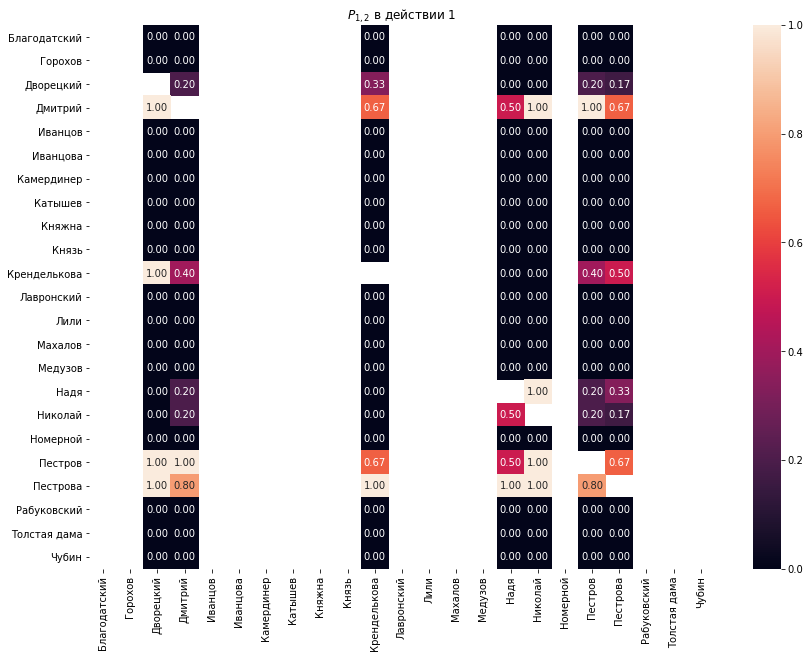

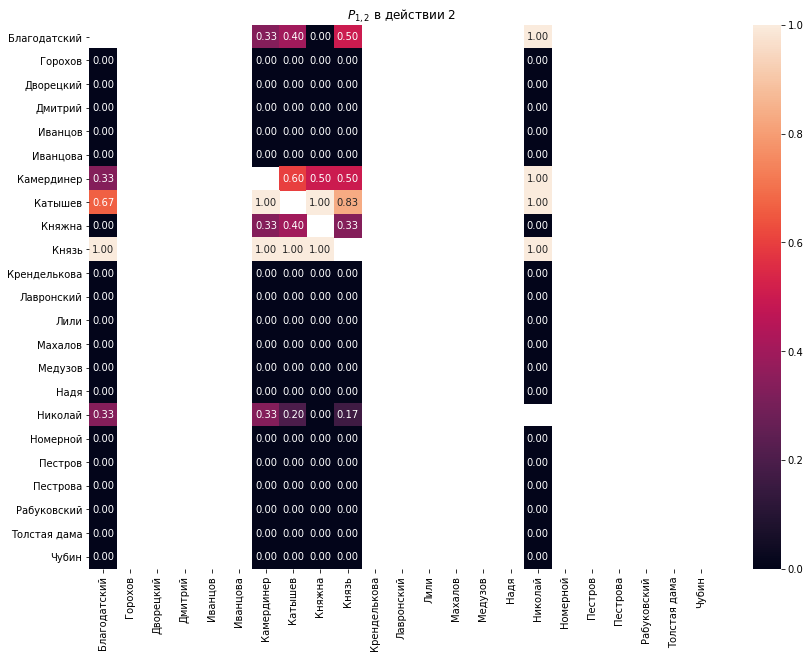

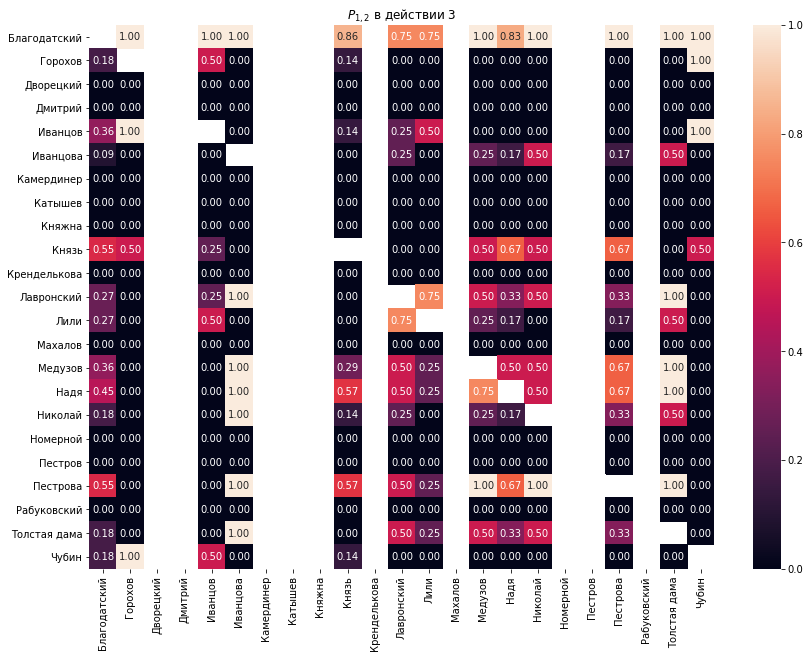

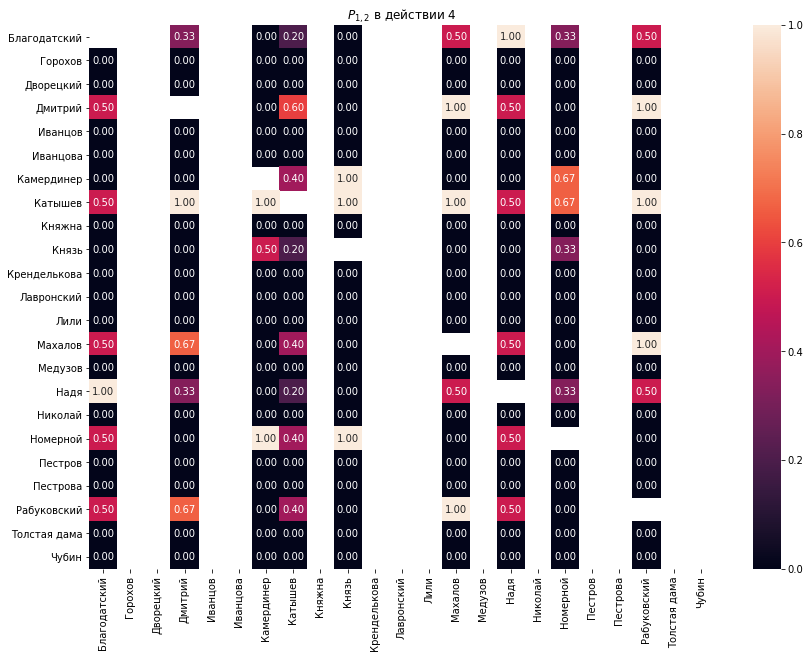

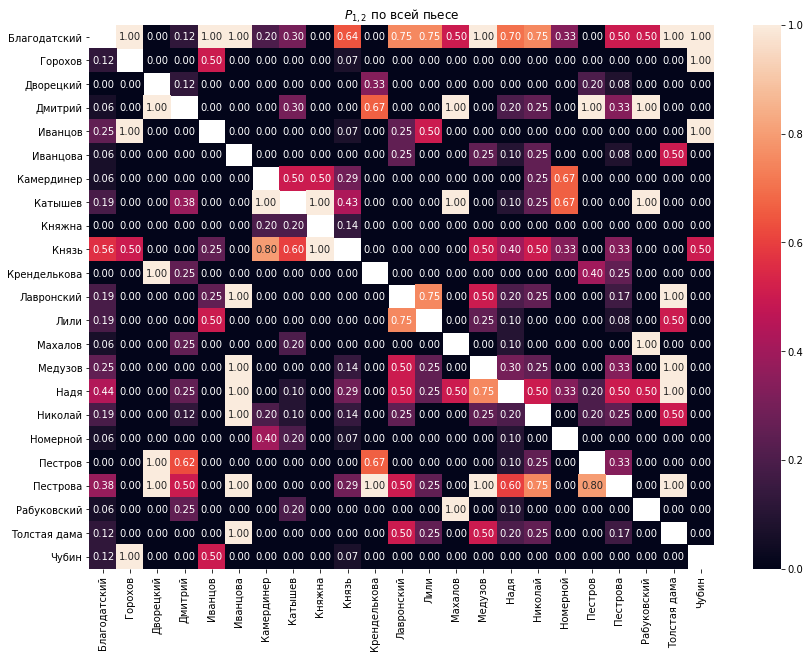

In [20]:
for i, m in enumerate(matrices):
    plt.subplots(figsize=(14, 10))
    sns.heatmap(rel_freq(m), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
    plt.title(r"$P_{1,2}$ в действии " + str(i+1));

plt.subplots(figsize=(14, 10))
sns.heatmap(rel_freq(matrix), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title(r"$P_{1,2}$ по всей пьесе");

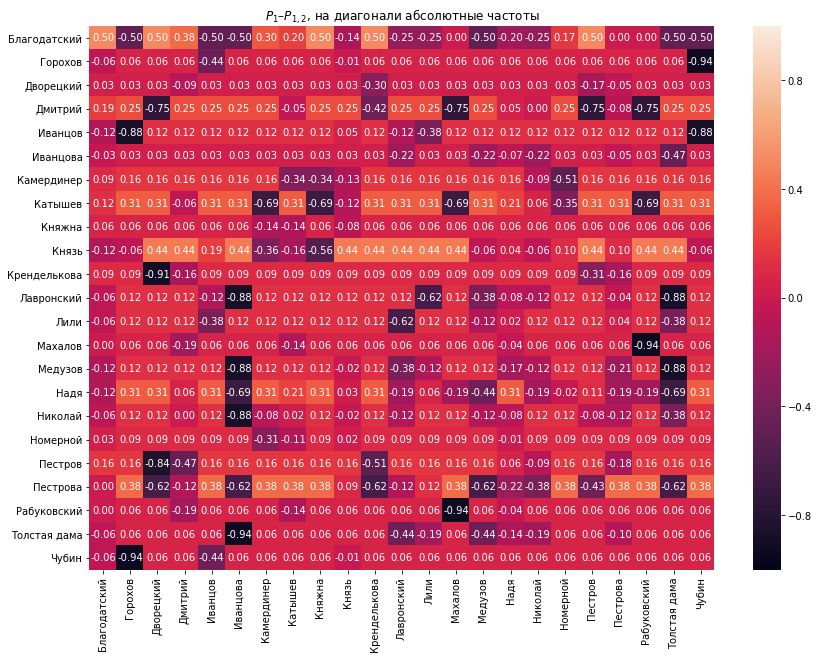

In [21]:
freq_abs = freq(matrix).reshape((-1, 1))
freq_rel = rel_freq(matrix)
freq_ = freq_abs - freq_rel
freq_[np.diag_indices(len(freq_[0]))] = freq_abs.ravel()
plt.subplots(figsize=(14, 10))
sns.heatmap(freq_, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f', vmin=-1, vmax=1)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");